<a href="https://colab.research.google.com/github/ahmedshaik982/Bike_Sharing_Demand_Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


In [564]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
import datetime
import warnings
warnings.filterwarnings('ignore')

In [565]:
# Mounting to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [566]:
# Loading the data 
data = pd.read_csv('/content/drive/My Drive/files/SeoulBikeData.csv',encoding='latin1')
data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [567]:
# Getiing the info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [568]:
# checking for duplicated values
data.duplicated().sum()

0

Hence, the data has no duplicated values

In [569]:
# Checking for null values
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Hence, the data has no null values. So we can deep dive into exploratory data analysis.

# **Exploratory Data Analysis**

In EDA, we explore the following things:


*   All the numerical features

*   All the categorical features

*   Distribution of numerical features

*   Cardinality of categorical features
*   Outliers


*   Relationship between independent features and dependent feature (Rented Bike Count)




In [570]:
# Converting Date column which is in string datatype to datetime datatype
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)

In [571]:
data['Hour'] = data['Hour'].astype(str)

In [572]:
data['Day'] = data['Date'].dt.day_name()

In [573]:
# Storing list of columns
col = data.columns
col

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Day'],
      dtype='object')

In [574]:
data.head()

Date  Rented Bike Count Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254    0             -5.2           37   
1 2017-01-12                204    1             -5.5           38   
2 2017-01-12                173    2             -6.0           39   
3 2017-01-12                107    3             -6.2           40   
4 2017-01-12                 78    4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day       Day  
0             Yes  Thursday  
1             Yes  Thursday  
2             Yes  Thursday  
3             Yes  Thursday  
4             Yes  Thursday

In [575]:
# Date feature
date_feat = [feature for feature in col if data[feature].dtype == 'datetime64[ns]']
date_feat

['Date']

In [576]:
# Getting the numerical features
num_feat = [feature for feature in col if data[feature].dtype != 'object' and data[feature].dtype != 'datetime64[ns]']
num_feat

['Rented Bike Count',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [577]:
# Getting the categorical features
cat_feat = [feature for feature in col if data[feature].dtype == 'O' ]
cat_feat

['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'Day']

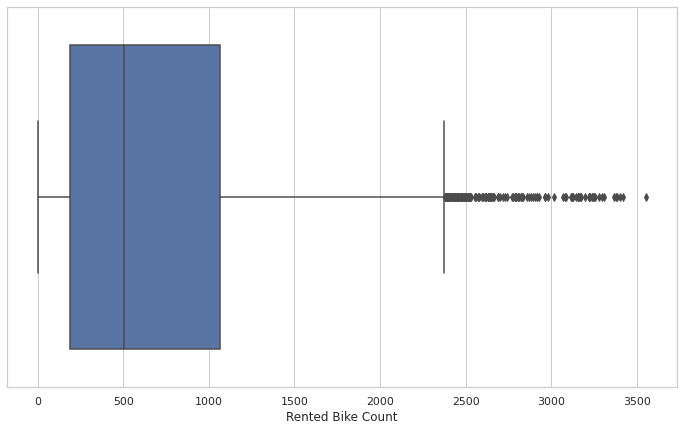

In [578]:
# Visualizing box plot of dependent feature (Rented Bike Count)
plt.figure(figsize = (12,7))
sns.boxplot(x = 'Rented Bike Count', data = data)
plt.show()

From the above box plot we can observe that count mostly ranges from 200 to 1100. And outliers are also present which are above 2400.

In [579]:
# Distribution of numerical features
# Creating a function which takes column name as attribute and returns the distribution plot
def dist_num_feat(feature):
  plt.figure(figsize = (8,6))
  sns.distplot(data[feature])
  plt.title(f'Distribution plot of {feature}')
  plt.show()

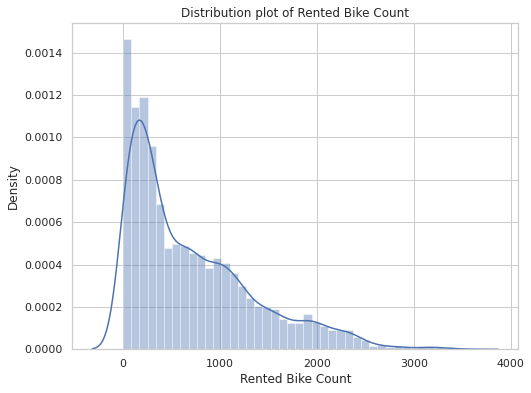

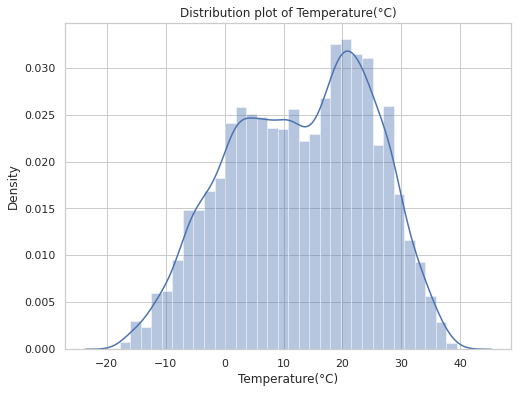

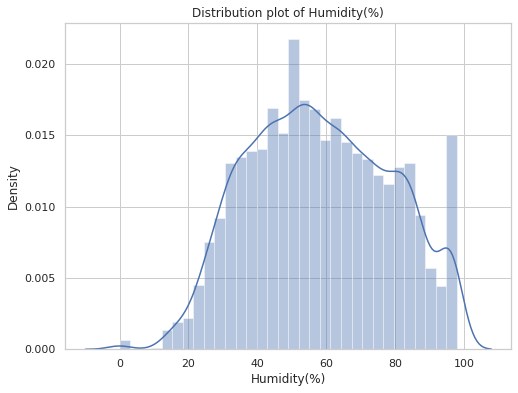

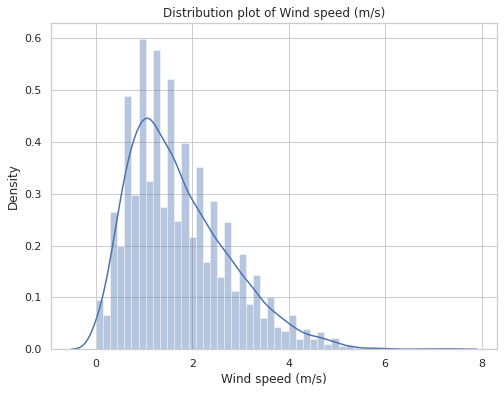

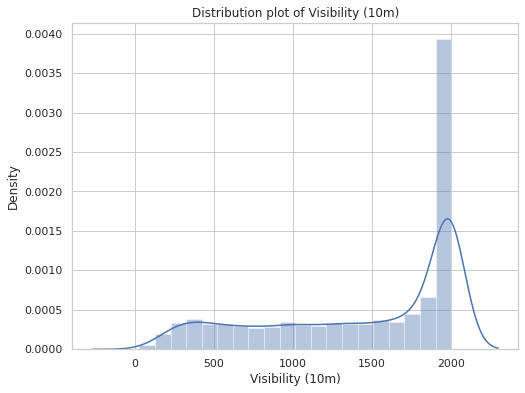

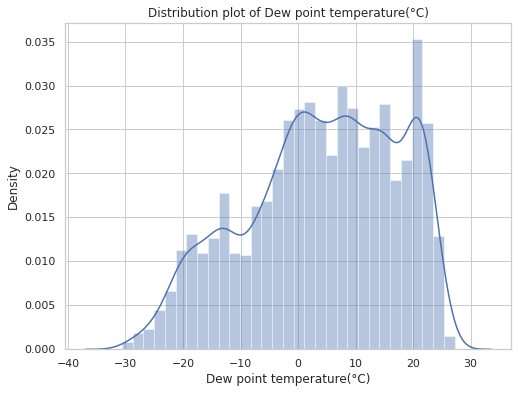

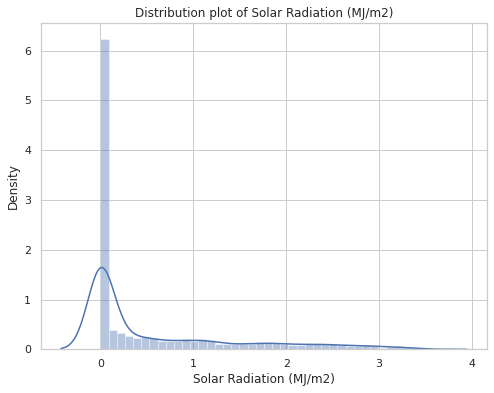

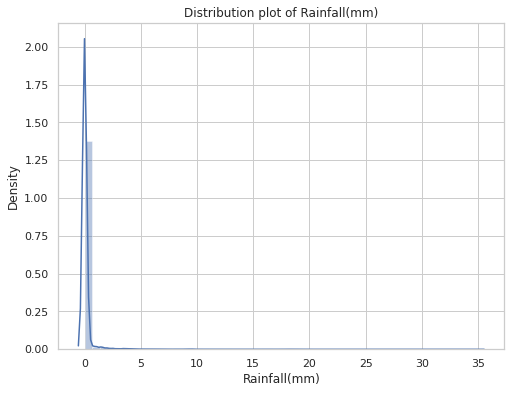

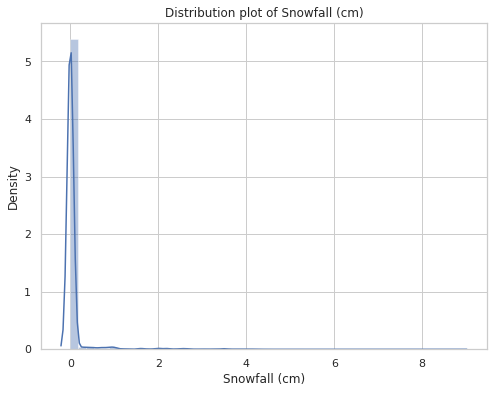

In [580]:
# Creating distribution plots for all numerical features
for feature in num_feat:
  dist_num_feat(feature)



*   Most number of the bike count ranges from 0 to 500.

*   Temperature mostly varies from 20 to 30
*   Humidity mostly varies from 20 to 100


*   Wind speed mostly varies from 2 to 4 m/s

*  Visibility of 2000 count is high.
*   Solar Radiation is mostly 0. And a few are in range of 1 to 4
*   Mostly there is no rainfall and snowfall. And a very few have rainfall and snowfall.






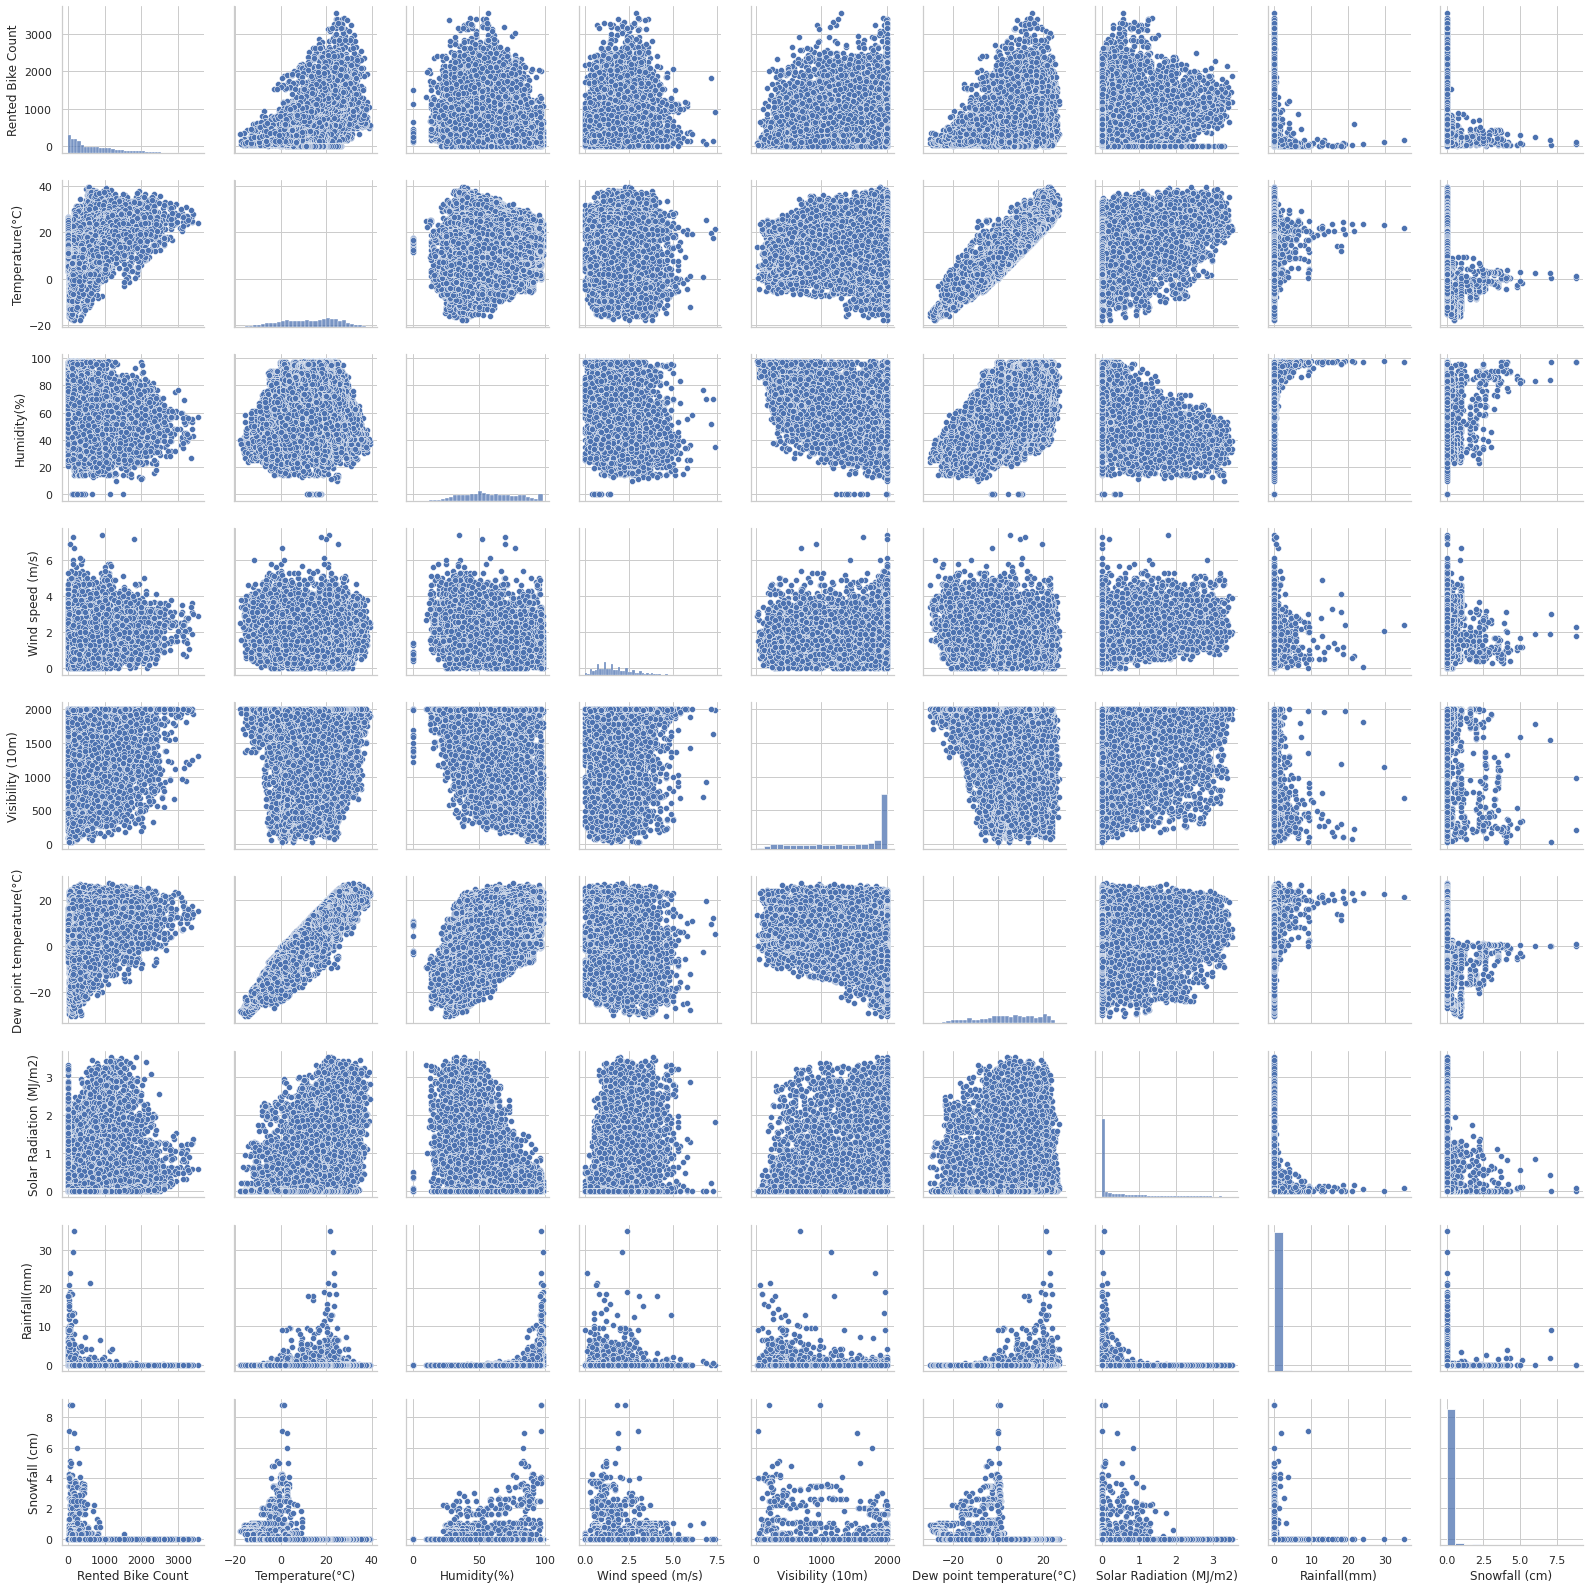

In [581]:
# Plotting pair plot
sns.pairplot(data)

In [582]:
# observing realtionship between independent and dependent feature
def scatter_plot(feature):
  plt.scatter(data[feature], data['Rented Bike Count'])
  plt.title(f'{feature} vs Rented Bike Count')
  plt.show()


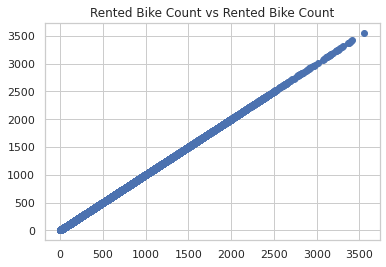

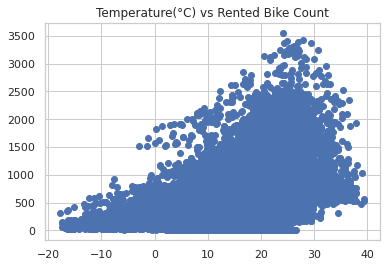

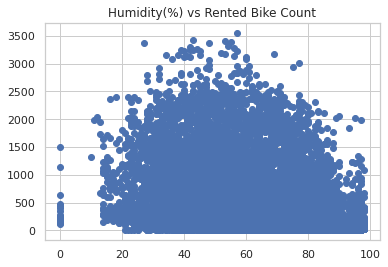

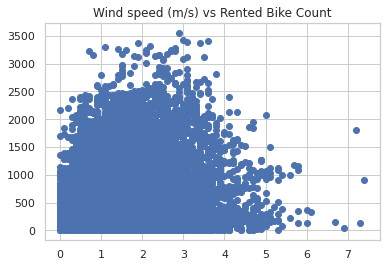

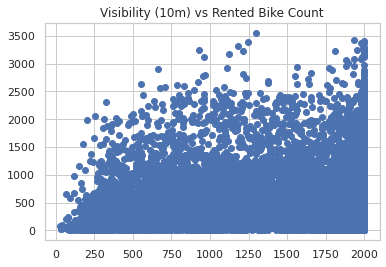

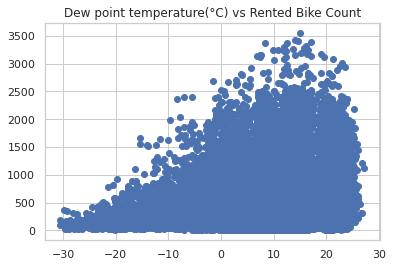

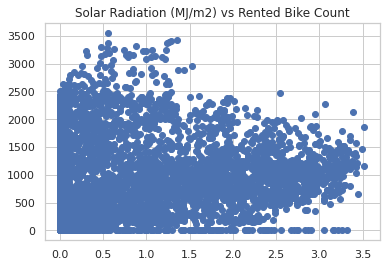

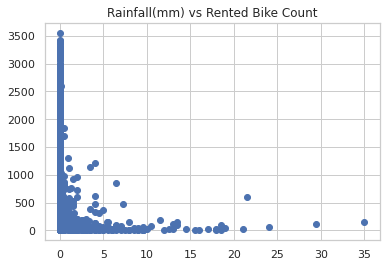

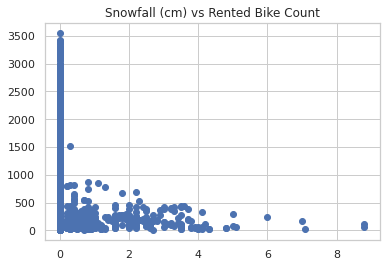

In [583]:
# Plotting scatter plots between dependent feature and numerical features
for feature in num_feat:
  scatter_plot(feature)
  print('\t'*2 )

From the above all scatter plots, the distribution between numerical features and dependent feature (Rented Bike Count) has been spread out entire area which means there is no specific relation between them.

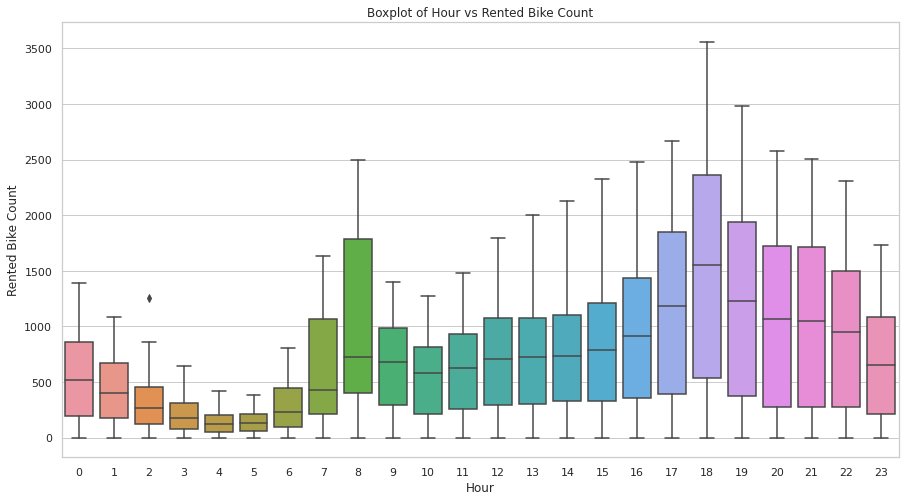

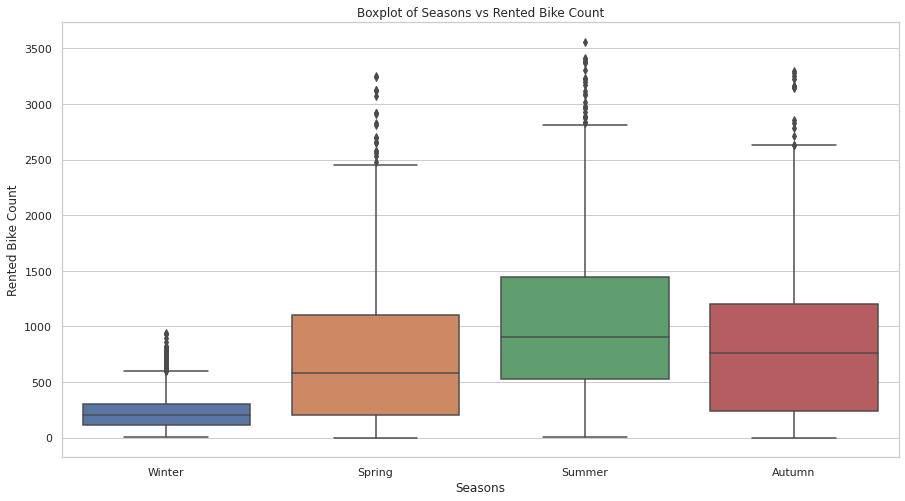

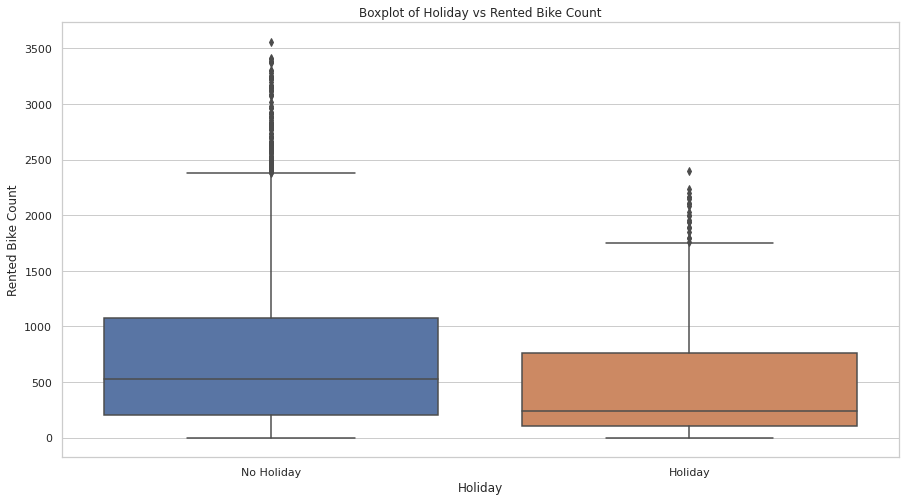

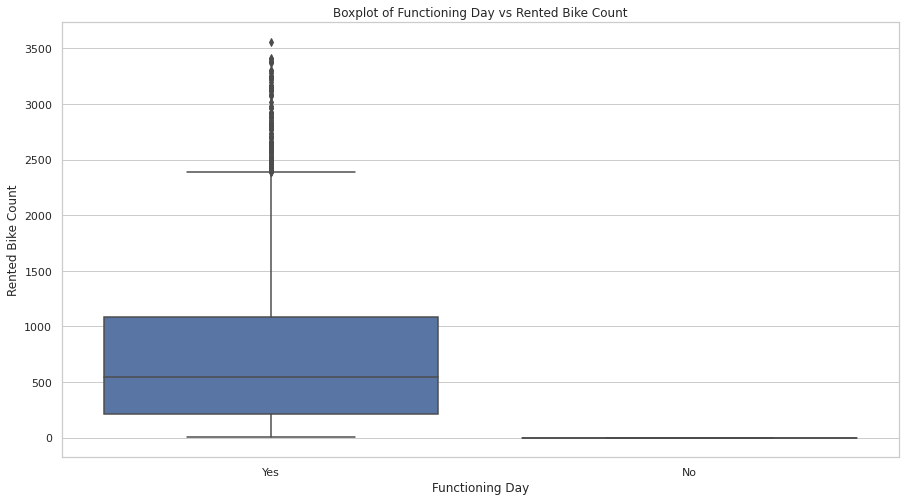

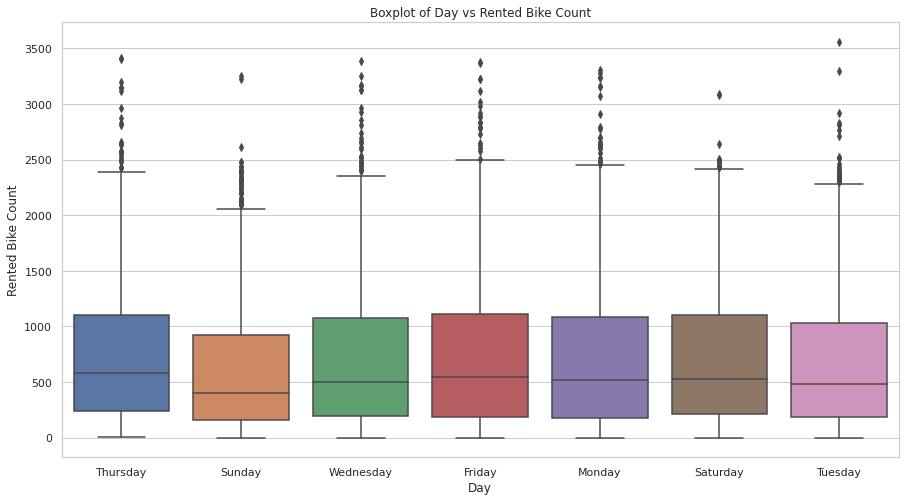

In [584]:
# Relationship between categorical features and Dependent feature (Rented Bike Count)
for feature in cat_feat:
  plt.figure(figsize = (15, 8))
  sns.boxplot(x = feature, y = 'Rented Bike Count', data = data)
  plt.title(f'Boxplot of {feature} vs Rented Bike Count')
  plt.show()
  print('\t ')

From the above box plots, we can see there are various outliers present in categorical features.

In [585]:
# Creating a dataframe of hours and their rented bike counts
hour_df = data.groupby('Hour')['Rented Bike Count'].sum().reset_index().sort_values(by = 'Rented Bike Count' , ascending = False)
hour_df

Hour  Rented Bike Count
10   18             548568
11   19             436229
9    17             415556
13   20             390172
14   21             376479
22    8             370731
8    16             339677
15   22             336821
7    15             302653
6    14             276971
5    13             267635
4    12             255296
16   23             244961
23    9             235784
21    7             221192
3    11             219311
0     0             197633
2    10             192655
1     1             155557
12    2             110095
20    6             104961
17    3              74216
19    5              50765
18    4              48396

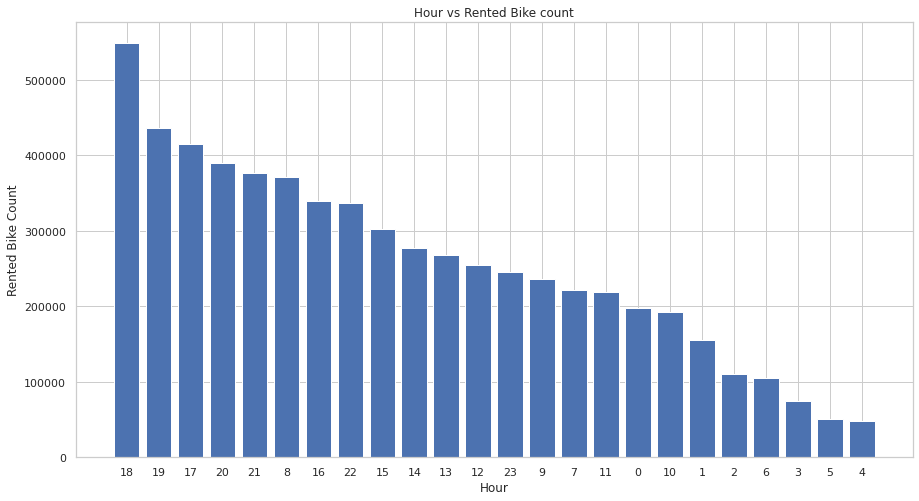

In [586]:
# Plotting the above dataframe 
plt.figure(figsize = (15, 8))
plt.bar(hour_df['Hour'], hour_df['Rented Bike Count'])
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.title('Hour vs Rented Bike count')
plt.show()

From the above dataframe and visualizations, we can say that more number of bikes are rented in the hour of 18 followed by 19th hour. And the least is 4th hour

In [587]:
# Variation of Seasons with Rented bike counts
season_df = data.groupby('Seasons')['Rented Bike Count'].mean().reset_index().sort_values(by = 'Rented Bike Count', ascending = False)
season_df

Seasons  Rented Bike Count
2  Summer        1034.073370
0  Autumn         819.597985
1  Spring         730.031250
3  Winter         225.541204

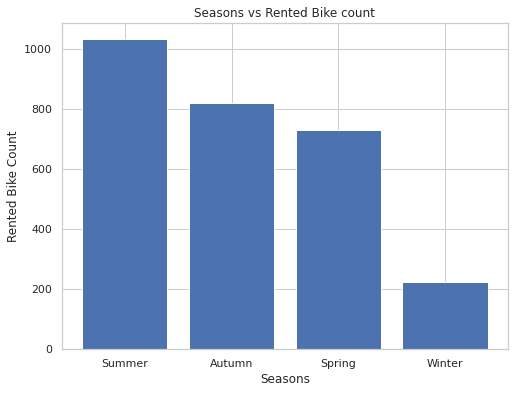

In [588]:
# Plotting the above dataframe
plt.figure(figsize = (8, 6))
plt.bar(season_df['Seasons'], season_df['Rented Bike Count'])
plt.xlabel('Seasons')
plt.ylabel('Rented Bike Count')
plt.title('Seasons vs Rented Bike count')
plt.show()

From the above dataframe and visualization, we can say that in summer season, most number of bikes are rented and the least is winter season.

In [589]:
# Variation of holiday with Rented bike counts
holiday_df = data.groupby('Holiday')['Rented Bike Count'].mean().reset_index().sort_values(by = 'Rented Bike Count', ascending = False)
holiday_df

Holiday  Rented Bike Count
1  No Holiday         715.228026
0     Holiday         499.756944

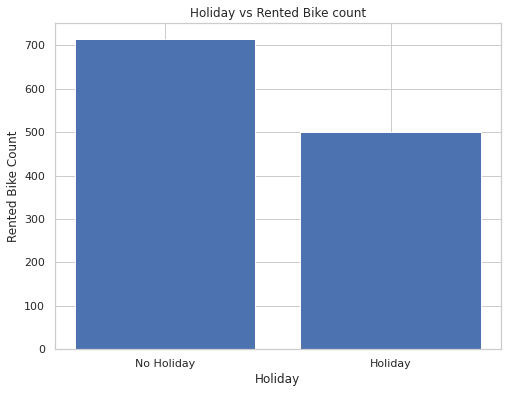

In [590]:
# Plotting the above dataframe
plt.figure(figsize = (8, 6))
plt.bar(holiday_df['Holiday'], holiday_df['Rented Bike Count'])
plt.xlabel('Holiday')
plt.ylabel('Rented Bike Count')
plt.title('Holiday vs Rented Bike count')
plt.show()

From the above dataframe and visualization, we can say that in working days(No Holiday), most number of bikes are rented.

In [591]:
# Variation of Day with Rented bike counts
day_df = data.groupby('Day')['Rented Bike Count'].mean().reset_index().sort_values(by = 'Rented Bike Count', ascending = False)
day_df

Day  Rented Bike Count
4   Thursday         743.803686
0     Friday         734.449346
2   Saturday         730.348558
1     Monday         719.635833
6  Wednesday         714.521226
5    Tuesday         678.362421
3     Sunday         615.968364

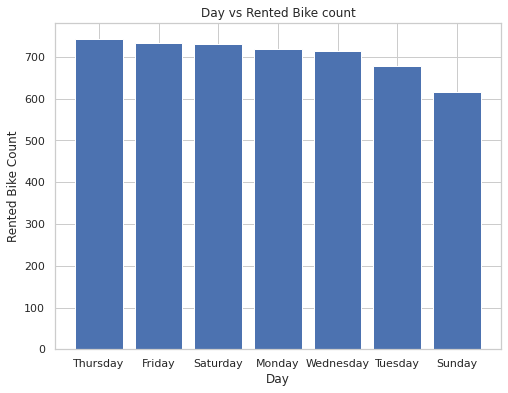

In [592]:
# Plotting the above dataframe
plt.figure(figsize = (8, 6))
plt.bar(day_df['Day'], day_df['Rented Bike Count'])
plt.xlabel('Day')
plt.ylabel('Rented Bike Count')
plt.title('Day vs Rented Bike count')
plt.show()

From the above dataframe and visualization, we can say that Thursday has high count of rented bike and the least is Sunday.

In [593]:
# Variation of Functioning Day with Rented bike counts
func_df = data.groupby('Functioning Day')['Rented Bike Count'].mean().reset_index().sort_values(by = 'Rented Bike Count', ascending = False)
func_df

Functioning Day  Rented Bike Count
1             Yes         729.156999
0              No           0.000000

From the above dataframe, In a functioning day, most number of bikes are rented.

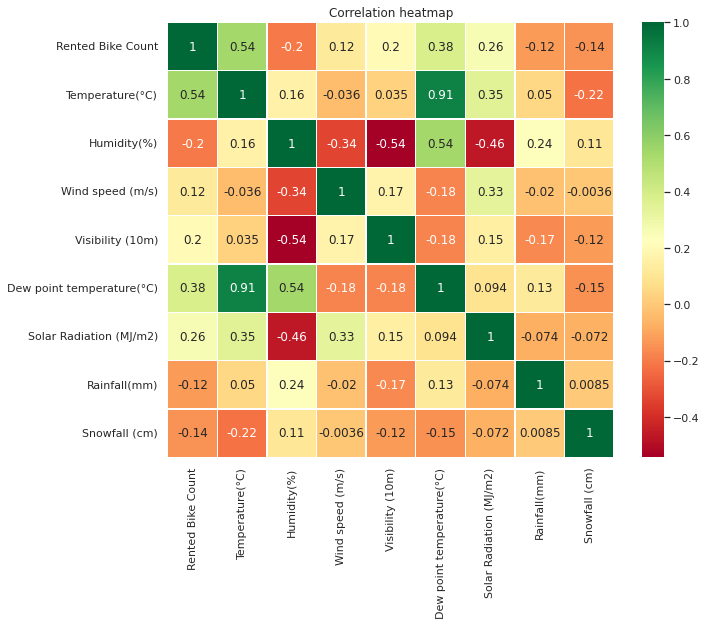

In [594]:
# Visualize the correl,ation heatmap of numerical features
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(),  fmt=".2g",cmap='RdYlGn',linewidths=0.30,  annot = True)
plt.title('Correlation heatmap')
plt.show()

From the above correlation heatmap, we can observe that multicollinearity exits between two features namely Temperature and Dew Point Temperature. And


*   Humidity, Rainfall, Snowfall are negatively correlated with dependent variable. That means, if the above feature values increases, dependent feature value will decreases and viceversa.




# **Data Preprocessing:**


In this step, we will do the following:


*   Applying log to 'Rented Bike Count' column as it is positively skewed

*   Removing Outliers

*   One hot encoding to categorical features

*   MinMax Scaling the features
*   Spliting the data into train and test datasets





In [595]:
# Creating the function which replaces 1 with 0 in dependent feature because we will apply log to the dependent feature
def log_dep(x):
  if x == 0:
    return 1
  else:
    return x

In [596]:
# Applying log to dependent feature to reduce skewness
data['Rented Bike Count'] = data['Rented Bike Count'].apply(log_dep)

In [597]:
# Creating a new feature named weekend
def weekend(x):
  if x == 'Monday' or x == 'Tuesday' or x == 'Wednesday' or x == 'Thursday' or x == 'Friday':
    return 0
  else :
    return 1

data['weekend'] = data['Day'].apply(weekend)

# Dropping date feature as it is no more useful in further process
data.drop(['Date', 'Day'], axis = 1, inplace = True) 

In [598]:
# Inspecting the data
data.head()

Rented Bike Count Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254    0             -5.2           37               2.2   
1                204    1             -5.5           38               0.8   
2                173    2             -6.0           39               1.0   
3                107    3             -6.2           40               0.9   
4                 78    4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  weekend  
0           0.0            0.0  Winter  No Holiday             Yes        0  
1           0.0            0.0  Winter  No Holiday             Yes        0  
2           0.0            0.0  Winter  No Holiday             Yes        0  
3           0.0            0.0  Winter  No Holiday             Yes        0  
4           0.0            0.0  Winter  No Holiday             Yes        0

In [599]:
# Apply log to dependent feature 
data['Rented Bike Count'] = np.log(data['Rented Bike Count'])

In [600]:
# Observing the statistical features of the features
data.describe()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
count        8760.000000      8760.000000  8760.000000       8760.000000   
mean            5.882209        12.882922    58.226256          1.724909   
std             1.585281        11.944825    20.362413          1.036300   
min             0.000000       -17.800000     0.000000          0.000000   
25%             5.252273         3.500000    42.000000          0.900000   
50%             6.223567        13.700000    57.000000          1.500000   
75%             6.970965        22.500000    74.000000          2.300000   
max             8.176392        39.400000    98.000000          7.400000   

       Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
count       8760.000000                8760.000000              8760.000000   
mean        1436.825799                   4.073813                 0.569111   
std          608.298712                  13.060369                 0.868746   
min           27.000000                 -30.600000                 0.000000   
25%          940.000000                  -4.700000                 0.000000   
50%         1698.000000                   5.100000                 0.010000   
75%         2000.000000                  14.800000                 0.930000   
max         2000.000000                  27.200000                 3.520000   

       Rainfall(mm)  Snowfall (cm)      weekend  
count   8760.000000    8760.000000  8760.000000  
mean       0.148687       0.075068     0.290411  
std        1.128193       0.436746     0.453978  
min        0.000000       0.000000     0.000000  
25%        0.000000       0.000000     0.000000  
50%        0.000000       0.000000     0.000000  
75%        0.000000       0.000000     1.000000  
max       35.000000       8.800000     1.000000

In the data every feature has some outliers. So we have to remove all of them.

In [601]:
# Removing Outliers
# Creating a for loop for storing the indeces of outliers
for i in num_feat:
  indeces = []                                              # creating a empty list
  x = data[i]
  mean = data[i].mean()
  std = data[i].std()
  index = data[(np.abs(x)) - (mean) >= (3 * std)].index     # getting the index of outlier
  indeces.append(index)                                     # appending outlier indeces into indeces list


In [602]:
# Displaying the list of indeces of outliers
list(indeces)[0]

Int64Index([ 222,  223,  224,  225,  226,  227,  228,  229,  230,  415,
            ...
            8620, 8621, 8622, 8623, 8624, 8625, 8626, 8627, 8628, 8629],
           dtype='int64', length=173)

In [603]:
# CReating a copy of data
new_data = data.copy()

In [604]:
# Dropping the outliers
new_data.drop(list(indeces)[0] , inplace = True)

In [605]:
# Inspecting the data
new_data.head()

Rented Bike Count Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0           5.537334    0             -5.2           37               2.2   
1           5.318120    1             -5.5           38               0.8   
2           5.153292    2             -6.0           39               1.0   
3           4.672829    3             -6.2           40               0.9   
4           4.356709    4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  weekend  
0           0.0            0.0  Winter  No Holiday             Yes        0  
1           0.0            0.0  Winter  No Holiday             Yes        0  
2           0.0            0.0  Winter  No Holiday             Yes        0  
3           0.0            0.0  Winter  No Holiday             Yes        0  
4           0.0            0.0  Winter  No Holiday             Yes        0

In [606]:
# One hot encoding using get_dummies which converts categorical feature into numerical features
df = pd.get_dummies(data = new_data, columns = ['Hour', 'Seasons', 'Holiday', 'Functioning Day'])

In [607]:
# Inspecting the data after one hot encoding
df.head()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0           5.537334             -5.2           37               2.2   
1           5.318120             -5.5           38               0.8   
2           5.153292             -6.0           39               1.0   
3           4.672829             -6.2           40               0.9   
4           4.356709             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  weekend  ...  Hour_8  Hour_9  Seasons_Autumn  \
0           0.0            0.0        0  ...       0       0               0   
1           0.0            0.0        0  ...       0       0               0   
2           0.0            0.0        0  ...       0       0               0   
3           0.0            0.0        0  ...       0       0               0   
4           0.0            0.0        0  ...       0       0               0   

   Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_Holiday  \
0               0               0               1                0   
1               0               0               1                0   
2               0               0               1                0   
3               0               0               1                0   
4               0               0               1                0   

   Holiday_No Holiday  Functioning Day_No  Functioning Day_Yes  
0                   1                   0                    1  
1                   1                   0                    1  
2                   1                   0                    1  
3                   1                   0                    1  
4                   1                   0                    1  

[5 rows x 42 columns]

From now, the data has only numerical values.

In [608]:
# inspecting columns of the data after one hot encoding
df.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'weekend',
       'Hour_0', 'Hour_1', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13',
       'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19',
       'Hour_2', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Hour_3',
       'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_Holiday', 'Holiday_No Holiday', 'Functioning Day_No',
       'Functioning Day_Yes'],
      dtype='object')

In [609]:
# Dropping the feature 'Dew point temperature(°C)' as it is highly correlated with Temperature feature
df.drop(['Dew point temperature(°C)'], axis = 1, inplace = True)

In [610]:
# storing independent and dependent features
dep_var = 'Rented Bike Count'
indep_var = list(set(df.columns.tolist()) - {dep_var})
indep_var

['Hour_23',
 'Snowfall (cm)',
 'Hour_8',
 'Hour_16',
 'Hour_0',
 'Hour_14',
 'Hour_5',
 'Functioning Day_Yes',
 'Hour_10',
 'Holiday_No Holiday',
 'Hour_4',
 'Hour_11',
 'Hour_13',
 'Hour_3',
 'Hour_2',
 'Seasons_Spring',
 'Hour_17',
 'weekend',
 'Hour_12',
 'Wind speed (m/s)',
 'Hour_6',
 'Hour_7',
 'Holiday_Holiday',
 'Seasons_Summer',
 'Temperature(°C)',
 'Hour_22',
 'Seasons_Winter',
 'Visibility (10m)',
 'Humidity(%)',
 'Hour_20',
 'Hour_15',
 'Functioning Day_No',
 'Hour_21',
 'Hour_9',
 'Rainfall(mm)',
 'Seasons_Autumn',
 'Hour_18',
 'Solar Radiation (MJ/m2)',
 'Hour_1',
 'Hour_19']

In [611]:
# Importing necessary libraries from sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [612]:
# Feature scaling using MinMaxScaler
scaler = MinMaxScaler()
df[indep_var] = scaler.fit_transform(df[indep_var])

In [613]:
df

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0              5.537334         0.220280     0.377551          0.297297   
1              5.318120         0.215035     0.387755          0.108108   
2              5.153292         0.206294     0.397959          0.135135   
3              4.672829         0.202797     0.408163          0.121622   
4              4.356709         0.206294     0.367347          0.310811   
...                 ...              ...          ...               ...   
8755           6.910751         0.384615     0.346939          0.351351   
8756           6.638568         0.370629     0.377551          0.310811   
8757           6.542472         0.356643     0.397959          0.040541   
8758           6.568078         0.347902     0.418367          0.135135   
8759           6.369901         0.344406     0.438776          0.175676   

      Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0             1.000000                      0.0           0.0            0.0   
1             1.000000                      0.0           0.0            0.0   
2             1.000000                      0.0           0.0            0.0   
3             1.000000                      0.0           0.0            0.0   
4             1.000000                      0.0           0.0            0.0   
...                ...                      ...           ...            ...   
8755          0.946275                      0.0           0.0            0.0   
8756          1.000000                      0.0           0.0            0.0   
8757          0.983781                      0.0           0.0            0.0   
8758          0.928535                      0.0           0.0            0.0   
8759          0.953877                      0.0           0.0            0.0   

      weekend  Hour_0  ...  Hour_8  Hour_9  Seasons_Autumn  Seasons_Spring  \
0         0.0     1.0  ...     0.0     0.0             0.0             0.0   
1         0.0     0.0  ...     0.0     0.0             0.0             0.0   
2         0.0     0.0  ...     0.0     0.0             0.0             0.0   
3         0.0     0.0  ...     0.0     0.0             0.0             0.0   
4         0.0     0.0  ...     0.0     0.0             0.0             0.0   
...       ...     ...  ...     ...     ...             ...             ...   
8755      0.0     0.0  ...     0.0     0.0             1.0             0.0   
8756      0.0     0.0  ...     0.0     0.0             1.0             0.0   
8757      0.0     0.0  ...     0.0     0.0             1.0             0.0   
8758      0.0     0.0  ...     0.0     0.0             1.0             0.0   
8759      0.0     0.0  ...     0.0     0.0             1.0             0.0   

      Seasons_Summer  Seasons_Winter  Holiday_Holiday  Holiday_No Holiday  \
0                0.0             1.0              0.0                 1.0   
1                0.0             1.0              0.0                 1.0   
2                0.0             1.0              0.0                 1.0   
3                0.0             1.0              0.0                 1.0   
4                0.0             1.0              0.0                 1.0   
...              ...             ...              ...                 ...   
8755             0.0             0.0              0.0                 1.0   
8756             0.0             0.0              0.0                 1.0   
8757             0.0             0.0              0.0                 1.0   
8758             0.0             0.0              0.0                 1.0   
8759             0.0             0.0              0.0                 1.0   

      Functioning Day_No  Functioning Day_Yes  
0                    0.0                  1.0  
1                    0.0                  1.0  
2                    0.0                  1.0  
3                    0.0                  1.0  
4                    0.0                  

In [614]:
df.describe()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
count        8587.000000      8587.000000  8587.000000       8587.000000   
mean            5.900991         0.541481     0.591510          0.233900   
std             1.591658         0.207636     0.206987          0.140646   
min             0.000000         0.000000     0.000000          0.000000   
25%             5.285735         0.381119     0.428571          0.121622   
50%             6.265301         0.559441     0.581633          0.202703   
75%             6.980076         0.708042     0.755102          0.310811   
max             8.176392         1.000000     1.000000          1.000000   

       Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
count       8587.000000              8587.000000   8587.000000    8587.000000   
mean           0.718799                 0.163725      0.004252       0.015874   
std            0.305881                 0.248415      0.032392       0.096714   
min            0.000000                 0.000000      0.000000       0.000000   
25%            0.471110                 0.000000      0.000000       0.000000   
50%            0.850988                 0.002841      0.000000       0.000000   
75%            1.000000                 0.269886      0.000000       0.000000   
max            1.000000                 1.000000      1.000000       1.000000   

           weekend       Hour_0  ...       Hour_8       Hour_9  \
count  8587.000000  8587.000000  ...  8587.000000  8587.000000   
mean      0.292768     0.041807  ...     0.041342     0.041342   
std       0.455059     0.200160  ...     0.199091     0.199091   
min       0.000000     0.000000  ...     0.000000     0.000000   
25%       0.000000     0.000000  ...     0.000000     0.000000   
50%       0.000000     0.000000  ...     0.000000     0.000000   
75%       1.000000     0.000000  ...     0.000000     0.000000   
max       1.000000     1.000000  ...     1.000000     1.000000   

       Seasons_Autumn  Seasons_Spring  Seasons_Summer  Seasons_Winter  \
count     8587.000000     8587.000000     8587.000000     8587.000000   
mean         0.250844        0.257133        0.257133        0.234890   
std          0.433524        0.437079        0.437079        0.423955   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        0.000000        0.000000        0.000000   
50%          0.000000        0.000000        0.000000        0.000000   
75%          1.000000        1.000000        1.000000        0.000000   
max          1.000000        1.000000        1.000000        1.000000   

       Holiday_Holiday  Holiday_No Holiday  Functioning Day_No  \
count      8587.000000         8587.000000         8587.000000   
mean          0.050309            0.949691            0.034354   
std           0.218594            0.218594            0.182148   
min           0.000000            0.000000            0.000000   
25%           0.000000            1.000000            0.000000   
50%           0.000000            1.000000            0.000000   
75%           0.000000            1.000000            0.000000   
max           1.000000            1.000000            1.000000   

       Functioning Day_Yes  
count          8587.000000  
mean              0.965646  
std               0.182148  
min               0.000000  
25%               1.000000  
50%               1.000000  
75%               1.000000  
max               1.000000  

[8 rows x 41 columns]

In [615]:
# Storing data of independent features and dependent feature into X and y respectively 
X = df[indep_var]
y = df[dep_var]

In [616]:
import statsmodels.api as sm

# create feature matrix and target variable

X = sm.add_constant(X) # add constant value for the intercept term


# define and fit model
lineare_regression_model = sm.OLS(y, X)
result = lineare_regression_model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1245.
Date:                Sat, 19 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:24:21   Log-Likelihood:                -8312.6
No. Observations:                8587   AIC:                         1.670e+04
Df Residuals:                    8550   BIC:                         1.696e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

From the above result, we can see the features with p value greater than 0.05 are not significant

In [617]:
# Feature selection method by mutual info regression
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X, y)
mutual_info

array([0.        , 0.00358776, 0.02704164, 0.01947894, 0.00638325,
       0.01385866, 0.00998122, 0.0430383 , 0.14451794, 0.01743197,
       0.01112673, 0.03899689, 0.02641206, 0.00613657, 0.02906728,
       0.01692842, 0.00907273, 0.01304501, 0.0111758 , 0.01410523,
       0.01494329, 0.01959112, 0.01111979, 0.00649779, 0.0607597 ,
       0.37203652, 0.01510936, 0.19025979, 0.06105709, 0.1056282 ,
       0.01186333, 0.0005225 , 0.14971454, 0.01153263, 0.01226744,
       0.0710324 , 0.068769  , 0.03347237, 0.18612005, 0.01250057,
       0.01671548])

In [618]:
# Creating a dataframe with features and thier dependence on dependent feature
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
info_df = mutual_info.sort_values(ascending = False).reset_index().rename(columns = {'index':'feature', 0:'info'})
info_df

feature      info
0           Temperature(°C)  0.372037
1            Seasons_Winter  0.190260
2   Solar Radiation (MJ/m2)  0.186120
3        Functioning Day_No  0.149715
4       Functioning Day_Yes  0.144518
5               Humidity(%)  0.105628
6              Rainfall(mm)  0.071032
7            Seasons_Autumn  0.068769
8          Visibility (10m)  0.061057
9            Seasons_Summer  0.060760
10                   Hour_5  0.043038
11                   Hour_4  0.038997
12                  Hour_18  0.033472
13                   Hour_3  0.029067
14            Snowfall (cm)  0.027042
15                  Hour_11  0.026412
16                   Hour_6  0.019591
17                   Hour_8  0.019479
18                  Hour_10  0.017432
19                   Hour_2  0.016928
20                  Hour_19  0.016715
21                  Hour_22  0.015109
22         Wind speed (m/s)  0.014943
23                  Hour_12  0.014105
24                   Hour_0  0.013859
25                  Hour_17  0.013045
26                   Hour_1  0.012501
27                   Hour_9  0.012267
28                  Hour_20  0.011863
29                  Hour_21  0.011533
30                  weekend  0.011176
31       Holiday_No Holiday  0.011127
32                   Hour_7  0.011120
33                  Hour_14  0.009981
34           Seasons_Spring  0.009073
35          Holiday_Holiday  0.006498
36                  Hour_16  0.006383
37                  Hour_13  0.006137
38                  Hour_23  0.003588
39                  Hour_15  0.000523
40                    const  0.000000

In [619]:
# Feature selection 
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
feature_selection = SelectFromModel(Lasso(alpha = 0.005, random_state = 0))
feature_selection.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [620]:
# Displaying the features with more importance
sel = X.columns[feature_selection.get_support()]
sel

Index(['Hour_23', 'Hour_8', 'Hour_5', 'Functioning Day_Yes', 'Hour_10',
       'Holiday_No Holiday', 'Hour_4', 'Hour_11', 'Hour_3', 'Hour_2',
       'Seasons_Spring', 'Hour_17', 'weekend', 'Hour_6', 'Hour_7',
       'Holiday_Holiday', 'Seasons_Summer', 'Temperature(°C)', 'Hour_22',
       'Seasons_Winter', 'Visibility (10m)', 'Humidity(%)', 'Hour_20',
       'Functioning Day_No', 'Hour_21', 'Hour_9', 'Rainfall(mm)',
       'Seasons_Autumn', 'Hour_18', 'Hour_19'],
      dtype='object')

In [621]:
# Function which prints the summary 
def summ(df):
  
  X = df[list(sel)]
  y = df['Rented Bike Count']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  X = sm.add_constant(X_train) # add constant value for the intercept term


  # define and fit model
  lineare_regression_model = sm.OLS(y_train, X)
  result = lineare_regression_model.fit()
  print(result.summary())


In [622]:
# Summary with only selected features
summ(df)

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1327.
Date:                Sat, 19 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:24:23   Log-Likelihood:                -6697.8
No. Observations:                6869   AIC:                         1.345e+04
Df Residuals:                    6841   BIC:                         1.364e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.839e+12   1

In [623]:
# Splitting the data into train and test datsets
from sklearn.model_selection import train_test_split
x = X[sel]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


In [624]:
X_train.shape

(6869, 30)

In [625]:
y_train.shape

(6869,)

In [626]:
X_test.shape

(1718, 30)

In [627]:
y_test.shape

(1718,)

In [628]:
# Creating a function which results evaluation metrics of the model.

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def metrics(model):
  # metrics for training dataset
  r2_tr = r2_score(y_train, model.predict(X_train))
  mse_tr = mean_squared_error(y_train, model.predict(X_train))
  rmse_tr = np.sqrt(mse_tr)
  
  n_tr = len(X_train)
  k_tr = len(X_train.columns)
  adj_r2_tr = 1 - ( ((n_tr-1)/(n_tr-k_tr-1)) * (1 - r2_tr) )

  mean_abs_err_tr = sum(abs(y_train - model.predict(X_train))) /len(y_train)

  dat_dict_tr = {'r2_score': r2_tr,
              'Mean Square Error':mse_tr,
              'Root mean square error':rmse_tr,
              'Adjusted r2':adj_r2_tr,
              'Mean absolute error': mean_abs_err_tr 
              }
  data_df_tr = pd.Series(dat_dict_tr).reset_index().rename(columns = {'index': 'Metric', 0:'value'})
  

  print('The evaluation metrics for training dataset.....')
  print(data_df_tr)


  print('\t')
  print('\t')

  # metrics for test dataset
  r2_te = r2_score(y_test, model.predict(X_test))
  mse_te = mean_squared_error(y_test, model.predict(X_test))
  rmse_te = np.sqrt(mse_te)
  
  n_te = len(X_test)
  k_te = len(X_test.columns)
  adj_r2_te = 1 - ( ((n_te-1)/(n_te-k_te-1)) * (1 - r2_te) )

  mean_abs_err_te = sum(abs(y_test - model.predict(X_test))) /len(y_test)


  dat_dict_te = {'r2_score': r2_te,
              'Mean Square Error':mse_te,
              'Root mean square error':rmse_te,
              'Adjusted r2':adj_r2_te,
              'Mean absolute error': mean_abs_err_te 
              }
  data_df_te = pd.Series(dat_dict_te).reset_index().rename(columns = {'index': 'Metric', 0:'value'})
  
  print('The evaluation metrics for test dataset.....')
  print(data_df_te)
  print('\t')



In [629]:
# Creating a function which plots actual and predicted values for the model 
def actual_pred(model):
  plt.figure(figsize = (20,12))
  plt.plot(np.array(y_test), color ='red')
  plt.plot(np.array(model.predict(X_test)), color = 'green')
  plt.legend(["Predicted","Actual"])
  plt.show()

# **Fitting into Model**

**Linear regression**

In [630]:
# Fitting the data into linear regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_model = lin_reg.fit(X_train, y_train) 


In [631]:
# Evluation metrics for linear regression
metrics(lin_model)

The evaluation metrics for training dataset.....
                   Metric     value
0                r2_score  0.834895
1       Mean Square Error  0.419083
2  Root mean square error  0.647366
3             Adjusted r2  0.834171
4     Mean absolute error  0.448731
	
	
The evaluation metrics for test dataset.....
                   Metric     value
0                r2_score  0.852420
1       Mean Square Error  0.370599
2  Root mean square error  0.608768
3             Adjusted r2  0.849795
4     Mean absolute error  0.422507
	


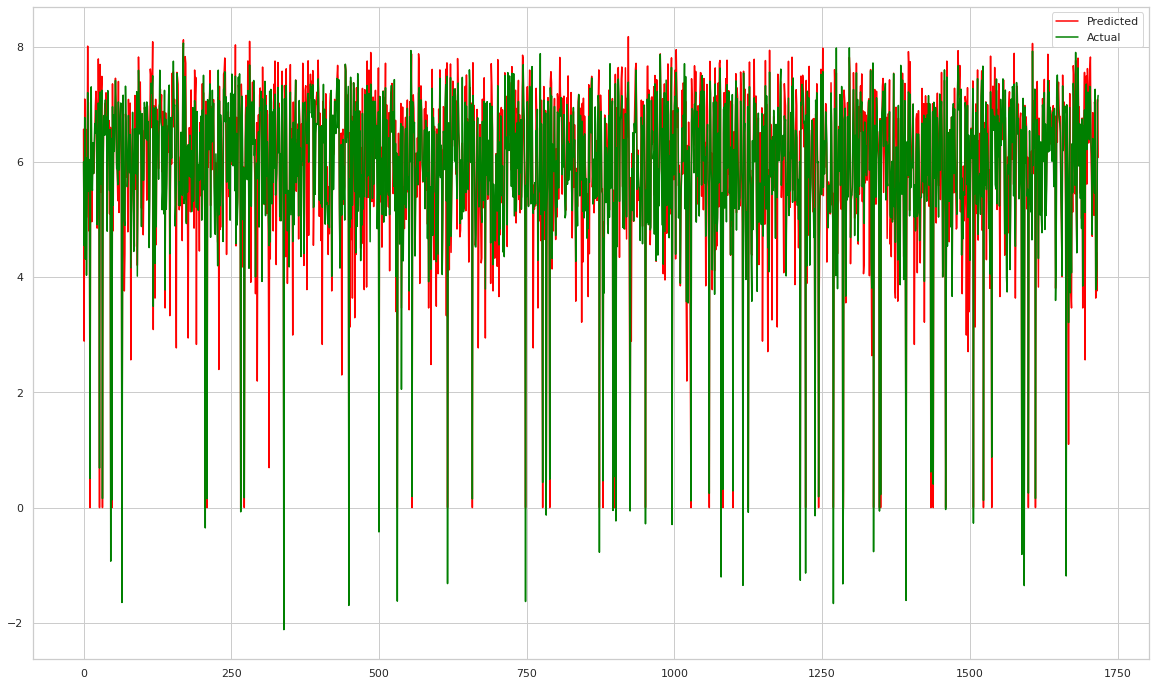

In [632]:
actual_pred(lin_model)

By fiiting the data into linear regression model, we get the 


*   score of training dataset :  0.842243
*   score of testing dataset : 0.823161



# **Lasso Regression**

In [633]:
# Implementing lasso regression with hyperparameter tuning
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_reg = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_reg = lasso_reg.fit(X_train,y_train)

In [634]:
# Getting best parameters after hyperparameter tuning
lasso_reg.best_params_

{'alpha': 0.001}

In [635]:
# Getting best score after hyperparameter tuning
lasso_reg.best_score_

-0.43034419599307644

In [636]:
# Metrics for lasso regression
metrics(lasso_reg)

The evaluation metrics for training dataset.....
                   Metric     value
0                r2_score  0.834335
1       Mean Square Error  0.420504
2  Root mean square error  0.648463
3             Adjusted r2  0.833608
4     Mean absolute error  0.452302
	
	
The evaluation metrics for test dataset.....
                   Metric     value
0                r2_score  0.850479
1       Mean Square Error  0.375472
2  Root mean square error  0.612758
3             Adjusted r2  0.847820
4     Mean absolute error  0.426590
	


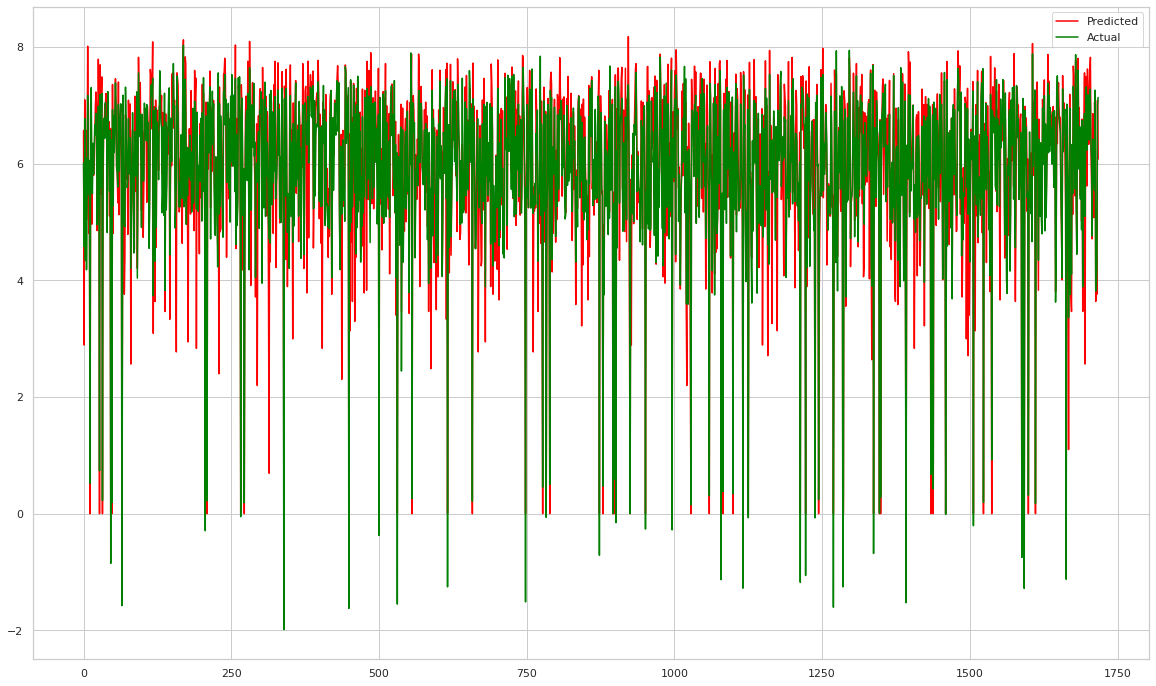

In [637]:
# Plotting actual and predicted values
actual_pred(lasso_reg)

By fiiting the data into lasso regression model, we get the 


*   score of training dataset :  0.842213
*   score of testing dataset : 0.823325



**Ridge Regression**

In [638]:
# Implementing Ridge regression with hyperparameter tuning
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_reg = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_reg = ridge_reg.fit(X_train,y_train)
ridge_reg

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [639]:
# Getting best parameters after hyperparameter tuning
ridge_reg.best_params_

{'alpha': 1}

In [640]:
# Getting best score after hyperparameter tuning
ridge_reg.best_score_


-0.42877167065496313

In [641]:
# Metrics for Ridge regression model
metrics(ridge_reg)

The evaluation metrics for training dataset.....
                   Metric     value
0                r2_score  0.834541
1       Mean Square Error  0.419980
2  Root mean square error  0.648058
3             Adjusted r2  0.833816
4     Mean absolute error  0.451827
	
	
The evaluation metrics for test dataset.....
                   Metric     value
0                r2_score  0.851049
1       Mean Square Error  0.374040
2  Root mean square error  0.611588
3             Adjusted r2  0.848400
4     Mean absolute error  0.425162
	


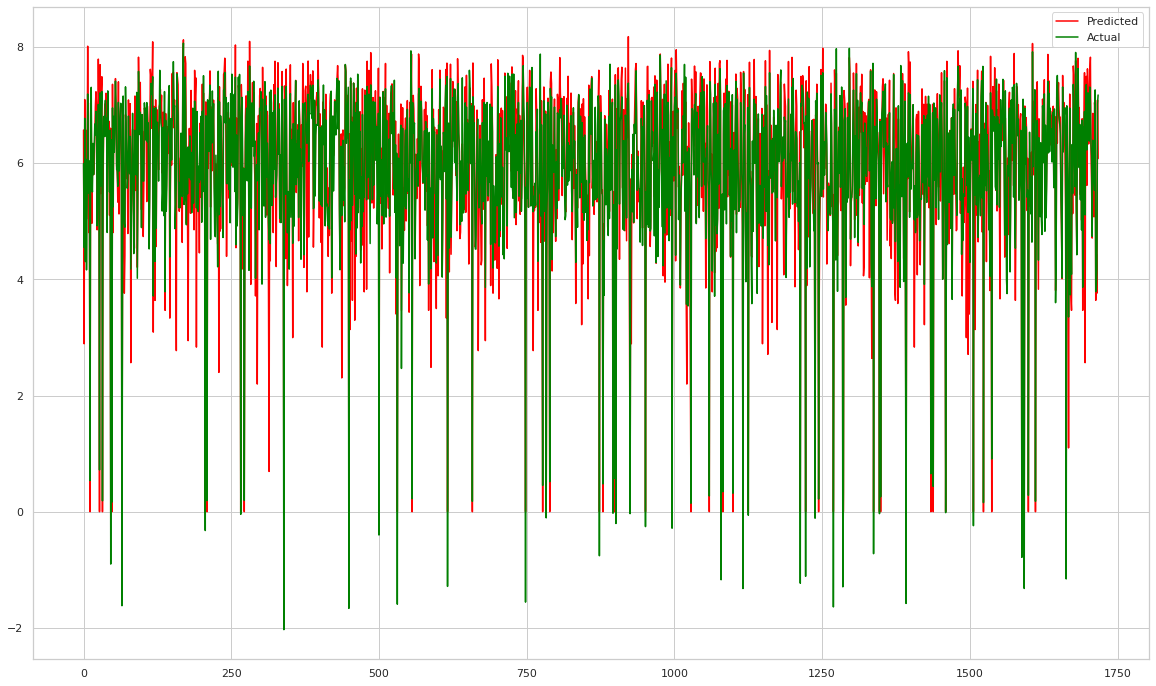

In [642]:
# Plotting actual and predicted values for Ridge regression model
actual_pred(ridge_reg)

By fiiting the data into Ridge regression model, we get the 


*   score of training dataset :  0.842220
*   score of testing dataset : 0.823099



**Decision Tree Regressor**





In [643]:
#Fitting the data into decision tree regressor model
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
des_tree_reg = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
des_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [644]:
# Evaluation metrics for training and testing datasets 
metrics(des_tree_reg)

The evaluation metrics for training dataset.....
                   Metric     value
0                r2_score  0.999996
1       Mean Square Error  0.000011
2  Root mean square error  0.003268
3             Adjusted r2  0.999996
4     Mean absolute error  0.000109
	
	
The evaluation metrics for test dataset.....
                   Metric     value
0                r2_score  0.867270
1       Mean Square Error  0.333306
2  Root mean square error  0.577326
3             Adjusted r2  0.864910
4     Mean absolute error  0.355721
	


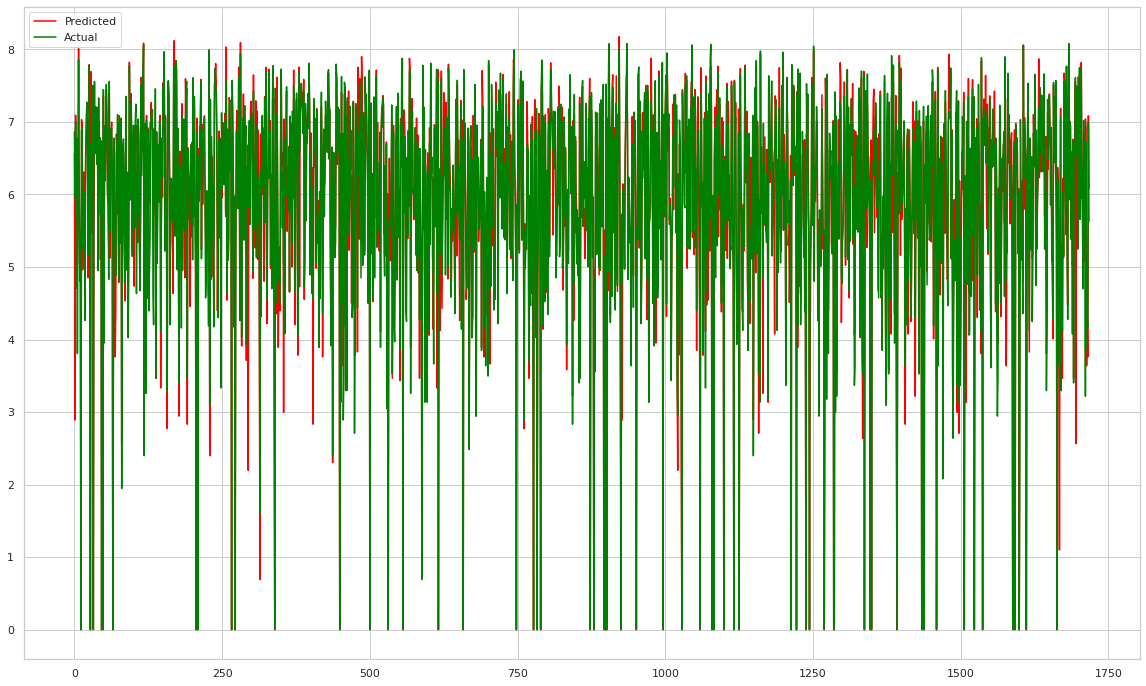

In [645]:
# Plotting the actual and predicted values of the model
actual_pred(des_tree_reg)

By fiiting the data into Desicion Tree regressor model, we get the 


*   score of training dataset :  0.999999
*   score of testing dataset : 0.845072


 We can say the model is overfitted. So lets do hyperparameter tuning.






In [646]:
# Hyper parameter tuning for the desicion tree regressor model
parameters = {"splitter":["best","random"],
            "max_depth" : [1,3,5,7],
           "min_samples_leaf":[1,2,3,4]
           }
des_tree_reg_hpt = GridSearchCV(des_tree_reg, parameters, scoring='neg_mean_squared_error', cv=3)
des_tree_reg_hpt.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 3, 5, 7],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [647]:
# Getting best parameters
des_tree_reg_hpt.best_params_

{'max_depth': 7, 'min_samples_leaf': 4, 'splitter': 'best'}

In [648]:
# Getting best score
des_tree_reg_hpt.best_score_

-0.4250303375142561

In [649]:
# Evaluation metrics for training and testing dataset
metrics(des_tree_reg_hpt)

The evaluation metrics for training dataset.....
                   Metric     value
0                r2_score  0.857029
1       Mean Square Error  0.362899
2  Root mean square error  0.602411
3             Adjusted r2  0.856402
4     Mean absolute error  0.441962
	
	
The evaluation metrics for test dataset.....
                   Metric     value
0                r2_score  0.853205
1       Mean Square Error  0.368625
2  Root mean square error  0.607145
3             Adjusted r2  0.850595
4     Mean absolute error  0.440013
	


After applying hyperparameter tuning, we get the 


*  score of training dataset : 0.856556
*  score of testing dataset : 0.842094



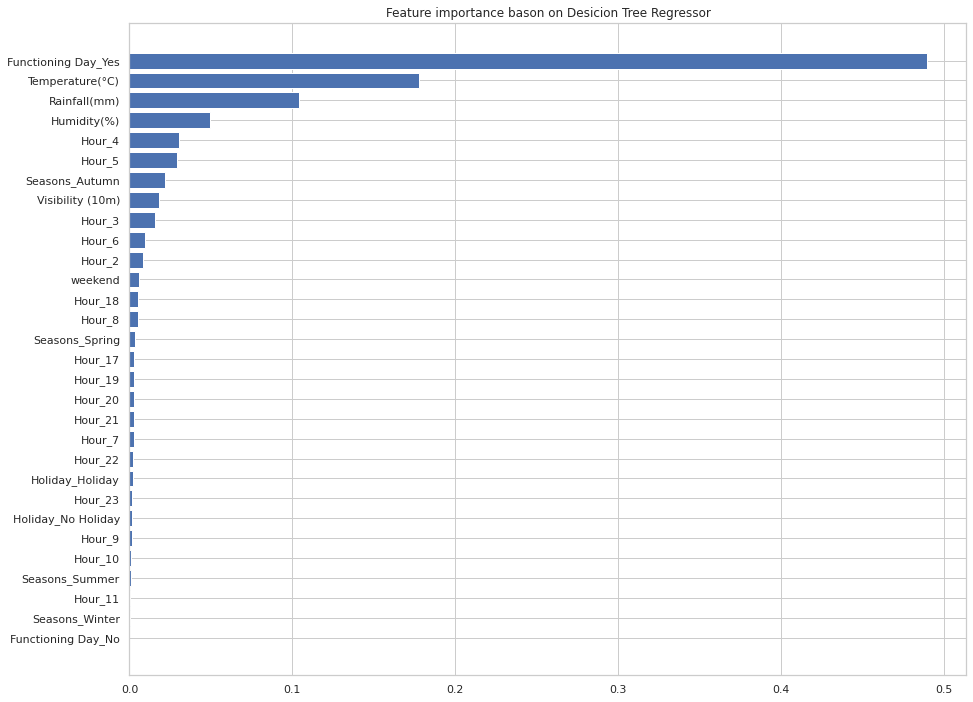

In [688]:
# Plotting feature importance for Desicion Tree Regressor
plt.figure(figsize = (15, 12))
feat_imp_ds = pd.DataFrame({'feature':X_train.columns, 'importance':des_tree_reg.feature_importances_}).sort_values(by = 'importance' , ascending = True)
plt.barh(feat_imp_ds['feature'], feat_imp_ds['importance'])
plt.title('Feature importance bason on Desicion Tree Regressor')
plt.show()

**Random Forest Regression**

In [650]:
# Fitting the data into Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [651]:
# Evaluation metrics of training and testing datasets
metrics(rf_reg)

The evaluation metrics for training dataset.....
                   Metric     value
0                r2_score  0.989249
1       Mean Square Error  0.027288
2  Root mean square error  0.165191
3             Adjusted r2  0.989202
4     Mean absolute error  0.104069
	
	
The evaluation metrics for test dataset.....
                   Metric     value
0                r2_score  0.932314
1       Mean Square Error  0.169972
2  Root mean square error  0.412276
3             Adjusted r2  0.931110
4     Mean absolute error  0.261906
	


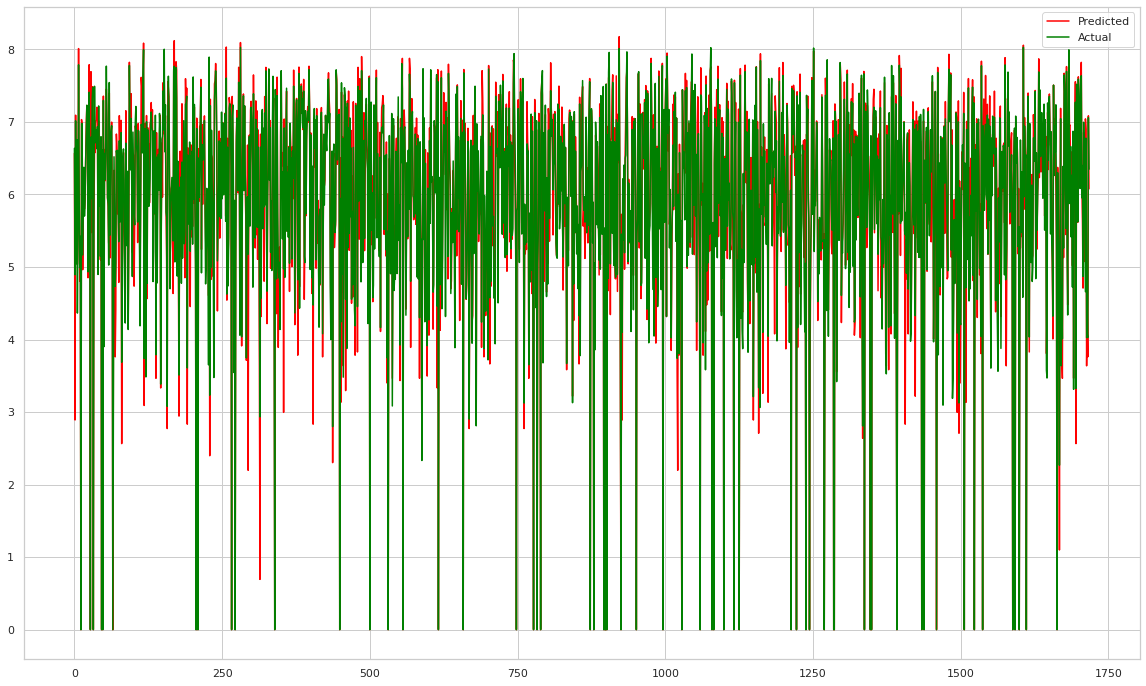

In [652]:
# Plotting the actual and predicted values of the model
actual_pred(rf_reg)

By fiiting the data into Random Forest regressor model, we get the 


*   score of training dataset :  0.988931
*   score of testing dataset : 0.931273

Which is somewhat overfitting. So lets reduce overfitting using hyperparameter tuning.












In [653]:
# Hyper parameter tuning for Random forest regressor model
parameters = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'min_samples_leaf': [3, 4, 5],
    'n_estimators': [100, 200, 300]
}
rf_reg_hpt = GridSearchCV(rf_reg, parameters, scoring='neg_mean_squared_error', cv=3)
rf_reg_hpt.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100],
                         'min_samples_leaf': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [654]:
# Best parameters
rf_reg_hpt.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'min_samples_leaf': 3,
 'n_estimators': 200}

In [655]:
# Best score
rf_reg_hpt.best_score_

-0.21604523227531777

In [656]:
# EValuation metrics 
metrics(rf_reg_hpt)

The evaluation metrics for training dataset.....
                   Metric     value
0                r2_score  0.968799
1       Mean Square Error  0.079197
2  Root mean square error  0.281419
3             Adjusted r2  0.968662
4     Mean absolute error  0.176113
	
	
The evaluation metrics for test dataset.....
                   Metric     value
0                r2_score  0.932958
1       Mean Square Error  0.168353
2  Root mean square error  0.410308
3             Adjusted r2  0.931766
4     Mean absolute error  0.264875
	


After applying hyperparameter tuning, we get the 


*  score of training dataset : 0.969197
*  score of testing dataset : 0.929319



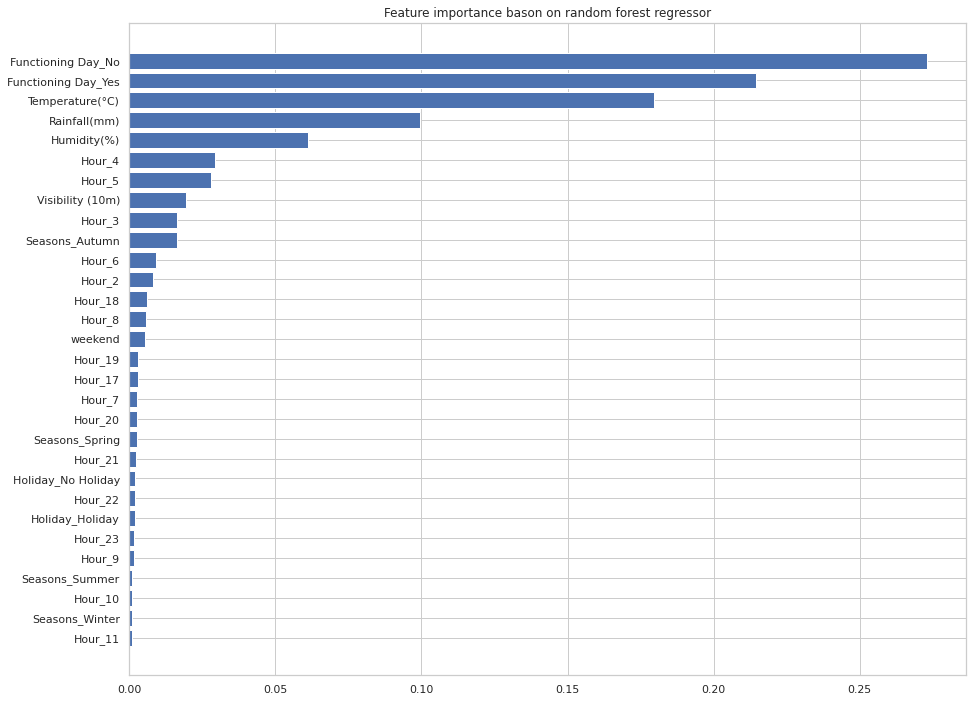

In [687]:
# Plotting feature importance for random forest regressor
plt.figure(figsize = (15, 12))
feat_imp_rf = pd.DataFrame({'feature':X_train.columns, 'importance':rf_reg.feature_importances_}).sort_values(by = 'importance' , ascending = True)
plt.barh(feat_imp_rf['feature'], feat_imp_rf['importance'])
plt.title('Feature importance bason on random forest regressor')
plt.show()

**GradientBoosting regression**

In [657]:
# Fitting the data into Gradient Boosting regressor model
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [658]:
# Evaluation metrics of training and testing datasets
metrics(gb_reg)

The evaluation metrics for training dataset.....
                   Metric     value
0                r2_score  0.916129
1       Mean Square Error  0.212889
2  Root mean square error  0.461399
3             Adjusted r2  0.915761
4     Mean absolute error  0.330765
	
	
The evaluation metrics for test dataset.....
                   Metric     value
0                r2_score  0.908926
1       Mean Square Error  0.228703
2  Root mean square error  0.478229
3             Adjusted r2  0.907306
4     Mean absolute error  0.333475
	


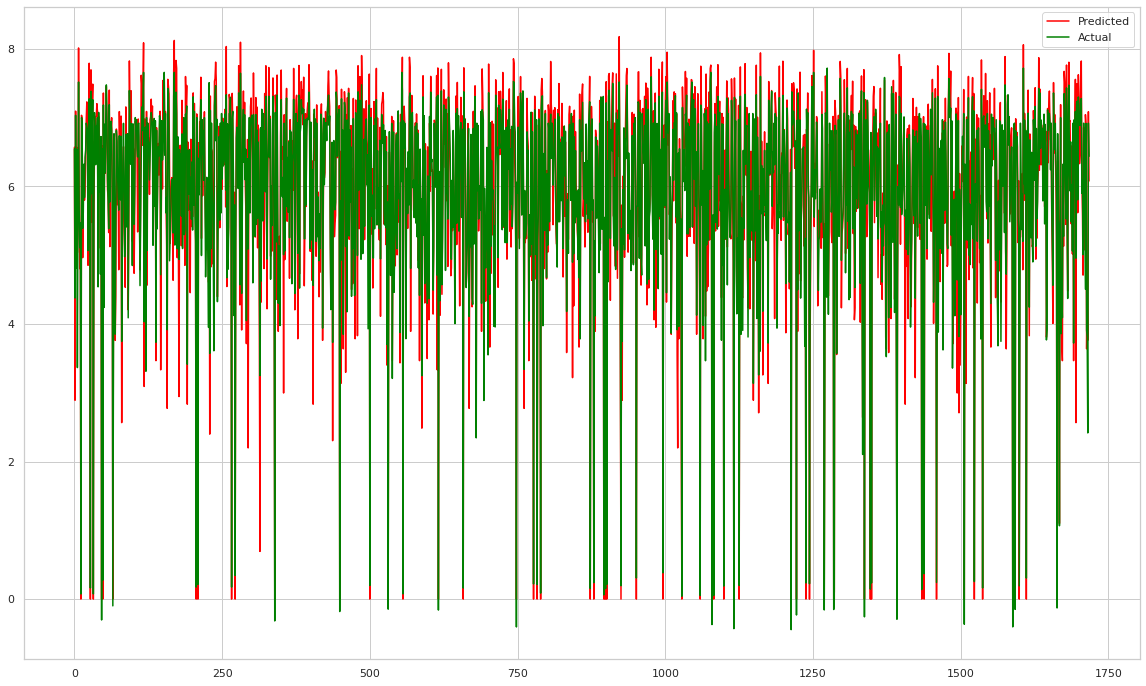

In [659]:
# Plotting the actual and predicted values of the model
actual_pred(gb_reg)

By fiiting the data into Gradient boosting regressor model, we get the 


*   score of training dataset :  0.915247
*   score of testing dataset : 0.911840









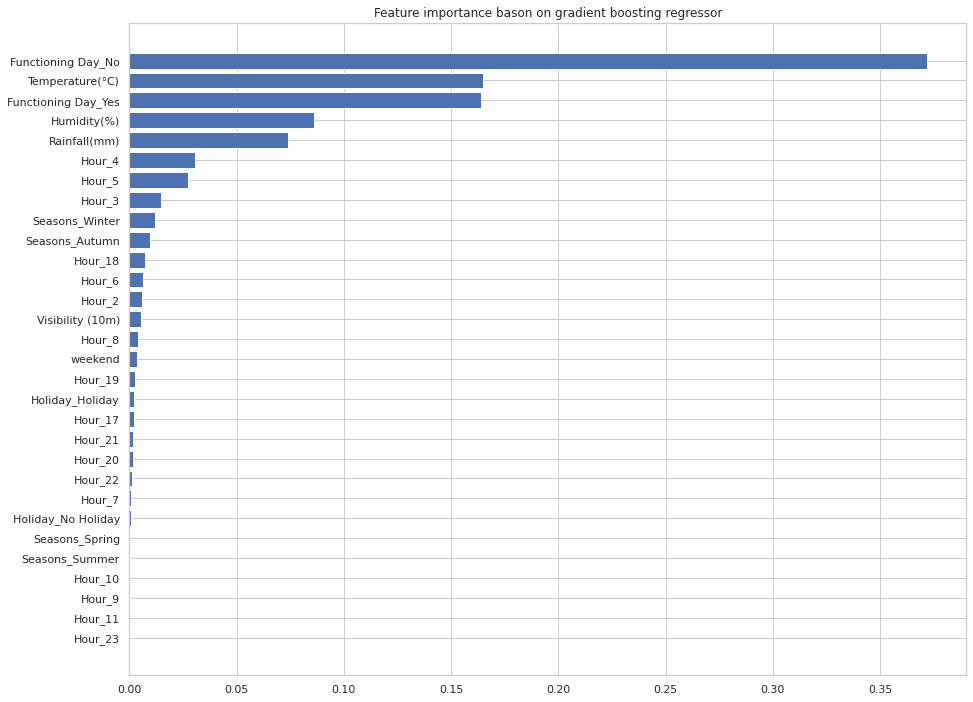

In [686]:
# Plotting feature importance for gradient boosting regressor
plt.figure(figsize = (15, 12))
feat_imp_gb = pd.DataFrame({'feature':X_train.columns, 'importance':gb_reg.feature_importances_}).sort_values(by = 'importance' , ascending = True)
plt.barh(feat_imp_gb['feature'], feat_imp_gb['importance'])
plt.title('Feature importance bason on gradient boosting regressor')
plt.show()

**XGBoost Regressor**

In [660]:
# Fitting the data into XGBoost regressor model
import xgboost
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

[12:29:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [661]:
# Evaluation metrics of training and testing datasets
metrics(xgb_reg)

The evaluation metrics for training dataset.....
                   Metric     value
0                r2_score  0.916946
1       Mean Square Error  0.210815
2  Root mean square error  0.459146
3             Adjusted r2  0.916581
4     Mean absolute error  0.328700
	
	
The evaluation metrics for test dataset.....
                   Metric     value
0                r2_score  0.909929
1       Mean Square Error  0.226184
2  Root mean square error  0.475588
3             Adjusted r2  0.908327
4     Mean absolute error  0.331882
	


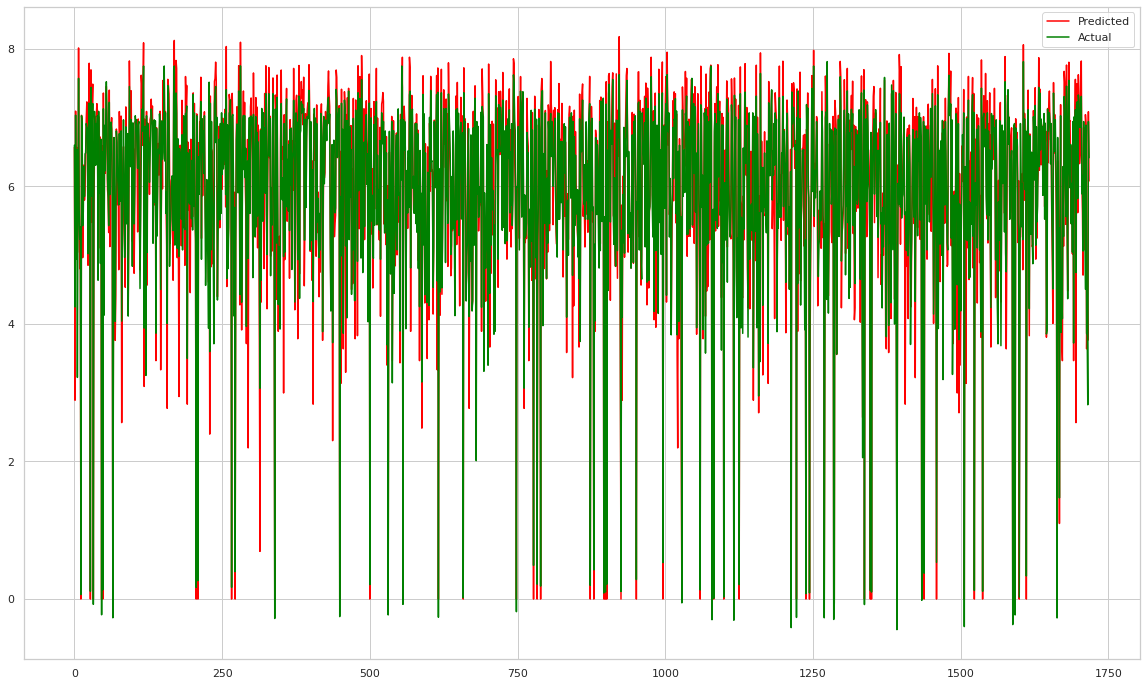

In [662]:
# Plottting actual and predicted values 
actual_pred(xgb_reg)

By fiiting the data into XGBoost regressor model, we get the 


*   score of training dataset :  0.915889
*   score of testing dataset : 0.914801









From the above all observations, we can see the optimal model is XGboost regressor and Gradient boosting regressor because those only have required score(no overfitting and no underfitting).

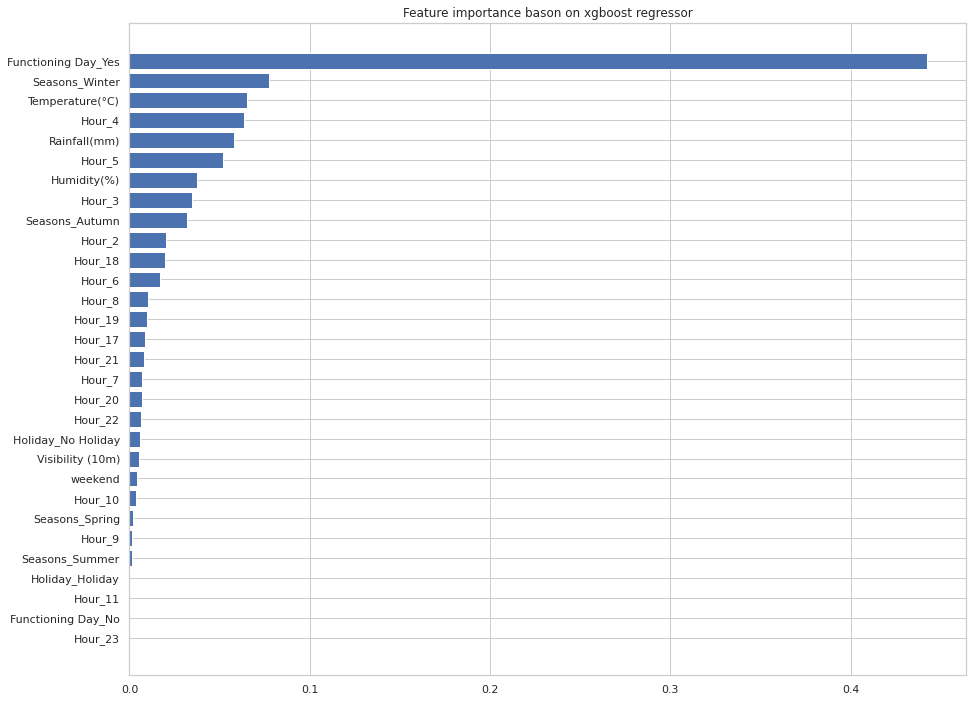

In [685]:
# Plotting feature importance for xgboost regressor
plt.figure(figsize = (15, 12))
feat_imp_df = pd.DataFrame({'feature':X_train.columns, 'importance':xgb_reg.feature_importances_}).sort_values(by = 'importance' , ascending = True)
plt.barh(feat_imp_df['feature'], feat_imp_df['importance'])
plt.title('Feature importance bason on xgboost regressor')
plt.show()

In [663]:
from sklearn.model_selection import cross_val_score
def cv_score(model):
  cvs = cross_val_score(model, X_test, y_test, cv = 5).mean()
  return cvs

In [664]:
cv_score(lin_model)

0.8353091265553354

In [665]:
cv_score(lasso_reg)

-0.36788913664515505

In [666]:
cv_score(ridge_reg)

-0.36666971068270543

In [667]:
cv_score(des_tree_reg)

0.8336270776807835

In [668]:
cv_score(rf_reg)

0.9040416747328714

In [669]:
cv_score(gb_reg)

0.8973322608351021

In [670]:
cv_score(xgb_reg)

[12:29:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8995486149271181